### Jupyter notebook contains a solutions from Chapter III — regression concepts from the book "Introduction To Statistical Learning" in a Python edition written by Daniela Witten, Trevor Hastie, Robert Tibshirani, Gareth James and Jonathan Taylor.

# Table of Contents

* [Exercise 3.1](#Exercise-3.1)
* [Exercise 3.2](#Exercise-3.2)
* [Exercise 3.3 (a)](#Exercise-3.3-a)
* [Exercise 3.3 (b)](#Exercise-3.3-b)
* [Exercise 3.3 (c)](#Exercise-3.3-c)
* [Exercise 3.4 (a)](#Exercise-3.4-a)
* [Exercise 3.4 (b)](#Exercise-3.4-b)
* [Exercise 3.4 (c)](#Exercise-3.4-c)
* [Exercise 3.4 (d)](#Exercise-3.4-d)
* [Exercise 3.5](#Excerise-3.5)
* [Exercise 3.6](#Exercise-3.6)
* [Exercise 3.7](#Exercise-3.7)


### Exercise 3.1

1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

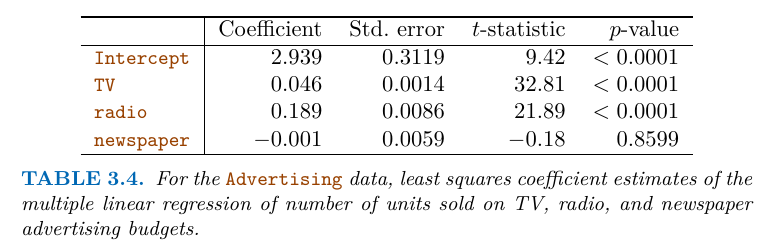


**Answer:** In this hypothesis testing table 3.4 corresponds to *t-test* to check whether each individual predictor has a significance on dependent variable $Y$.

In this situation, we have:
* $H_0$ (null hypothesis): There is no relationship between $X_j$ and dependent variable $Y$ (mathematically it corresponds to: $\beta_j = 0$),
* $H_a$ (alternative hypothesis): There is a relationship between $X_j$ and dependent variable $Y$ (mathmatically it corresponds to $\beta_j \neq 0$)

* given `TV` and correspondning $p$-value as well as $t$-statistic we have a strong evidence that predictor `TV` has significance on a dependent variable `sales`, so we can reject $H_0$ in favor of $H_a$,

* `radio`, another predictor with very small $p$-value and large $t$-statistic, provides a strong evidence that, in fact `radio` has significance on a dependent variable `sales`, so we can reject $H_0$ in favor of $H_a$,

* finally `newspaper`, $\text{p-value} = 0.8599$ and close to 0, $\text{t-statistic} = -0.18$ indicates a no association between `newspaper` and `sales`, so we can reject $H_a$ in favor of $H_0$.

### Exercise 3.2

Carefully explain the differences between the KNN classifier and KNN
regression methods.

**Answer**: 

* KNN classifier predicts a *qualitative* response variable, whereas KNN regression predicts *quantative* response variable,
* KNN classifier predicts a reponse variable $Y$ to a new data point $x_0$ by counting a classes which belong to the clossest $K$ neighbors to $x_0$, the most numerous class will be a predicted value $y$ for $x_0$, whereas in KNN regressor a prediction is based on a sum of average $y_i$ points which belong to $K$ neighbors observations,
* the decision boundary of KNN classifier in $X \in \mathbb{R}^{n \times 2}$ a line separation between classes, whereas in KNN regression would be a stepped plane.

### Exercise 3.3 a

Suppose, we have a data set with five predictors: $X_1 = \text{GPA}, X_2 = \text{IQ}, X_3 = \text{Level (1 for College and 0 for High School)}, X_4 = \text{Interaction between IQ and GPA}, X_5 = \text{Interaction between GPA and Level}$. The response is starting salary after graduation (in thousands of dollars). Suppose, we use least squares to fit the model, and get:
$\hat{\beta_0} = 50, \hat{\beta_1} = 20, \hat{\beta_2} = 0.07, \hat{\beta_3} = 35, \hat{\beta_4} = 0.01, \hat{\beta_5} = -10$

(a) Which answer is correct, and why?

i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates. — **True**

ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates. — **False**

iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough. — **True**

iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough. — **False**

**Answer**: 

Our formula is:

$$Y = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + \hat{\beta_4}X_4 + \hat{\beta_5}X_5 + \epsilon$$

Which can be described as an interaction terms:

$$Y = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + \hat{\beta_3X_3} + \hat{\beta_4}X_1X_2 + \hat{\beta_5}X_1X_3 + \epsilon $$

And can be written as:

$$Y = \hat{\beta_0} + (\hat{\beta_1} + \hat{\beta_4}X_2 + \hat{\beta_5}X_3)X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + \epsilon $$

So, given $x_0$ our test observation which:

$$
\begin{bmatrix}
    4.0 & 100 & 1/0 & 400 & 4/0
\end{bmatrix}
$$

We see, 1/0 is a corresponding $X_3$ one-hot encoded predictor and $X_5$ is an interaction between $X_1$ and $X_3$.

Now, let's do some calculations, first we will check **i. for a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates**:

i) For high school graduate ($X_3 = 0$):

$$Y = 50 + (20 + 0.01 \cdot 100 + (-10) \cdot 0) \cdot 4.0 + 0.07 \cdot 100 + 35 \cdot 0 = 141$$

i) For college graduate ($X_3 = 1$):

$$Y = 50 + (20 + 0.01 \cdot 100 + (-10) \cdot 1) \cdot 4.0 + 0.07 \cdot 100 + 35 \cdot 1 = 136$$

So, on average high school graduate earns more than graduate college person.

Given a regression equation:

$$Y = 50 + 20X_1 + 0.07X_2 + 35X_3 + 0.01(X_1 \cdot X_2) - 10(X_1 \cdot X_3)$$

The difference between the salaries of high school and college graduates, keeping IQ and GPA constant can be expressed as follows:

$$Y_{\text{diff}} = Y_{\text{college}} - Y_{\text{hs}}$$

So, we can write as:

$$Y_{\text{diff}} = (50 + 20X_1 + 0.07X_2 + 35 \cdot 1 + 0.01(X_1 \cdot X_2) - 10(X_1 \cdot X_3)) - (50 + 20X_1 + 0.07X_2 + 35 \cdot 0 + 0.01(X_1 \cdot X_2) - 10(X_1 \cdot X_3)) = 35 - 10X_1$$

$$35 - 10X_1 = 0$$

$$10X_1 = 35$$

$$X_1 = 3.5$$

This means that at a GPA of 3.5, the earnings for college and high school graduates are equal. 

For a GPA higher than 3.5, the earnings for high school graduates are higher, since the coefficient for the interaction term between GPA and Level is negative (-10).

### Exercise 3.3 b

Predict the salary of a college graduate with $\text{IQ}$ of $110$ and a $\text{GPA}$ of $4.0$.

$$
x_0 = \begin{bmatrix}
    4.0 & 110 & 1 & 440 & 4.0
\end{bmatrix}
$$

Given our test observation $x_0$, we predict the salary using:

$$
Y = \hat{\beta_0} + (\hat{\beta_1} + \hat{\beta_4}X_2 + \hat{\beta_5}X_3)X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + \epsilon
$$

Now we substitute under the formula our values:

$$
Y = 50 + (20 + 0.01 \cdot 110 + (-10) \cdot 1) \cdot 4.0 + 0.07 \cdot 110 + 35 \cdot 1 = 137.1
$$

Predicted salary is $137.1 \cdot 1000 = 137,100\$$

### Exercise 3.3 c

True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

**Answer**: **False** — we need perform a $\text{t-test}$ to check whether statistically significant is an interaction between IQ and GPA. We also need to check corresponding $\text{p-value}$ to check whether we need to reject $H_0$ or $H_a$.

### Exercise 3.4 a

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. $Y = \beta_0 + \beta_1X + \beta_2X^{2} + \beta_3X^{3} + \epsilon$

(a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Answer**: As if we are going to cubic fit, the more flexible model the training $\text{RSS}$ can be smaller or equal to a training $\text{RSS}$ of a linear model. However, with $n = 100$ the cubic model may over-fit easily (thus lower training $\text{RSS}$) and can perform worse than linear fit on the unseen data.

### Exercise 3.4 b

(b) Answer (a) using test rather than training $\text{RSS}$

**Answer**: In this setting I defienietly put linear fit to be better, even a training $\text{RSS}$ of cubic fit is lower. The more complex methods tend to overfit and I think that the cubic would perform much worse on the unseen data than linear fit.

### Exercise 3.4 c

(c)  Suppose that the true relationship between $X$ and $Y$ is not linear, but we don’t know how far it is from linear. Consider the training $\text{RSS}$ for the linear regression, and also the training $\text{RSS}$ for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**Answer**: I think that still $\text{RSS}$ of a cubic fit may be lower than $\text{RSS}$ of linear method. Since, we don't know how far is it from linear, the cubic is a more flexible method than a linear one and it might capture better this relationship $f(X)$ than a linear fit. 

### Exercise 3.4 d

(d) Answer (c) using test rather than training RSS.

**Answer**: Due to unknown $n$, I would answer to this question that we don't know whether linear or cubic fit may be better in a test $\text{RSS}$. More flexible method tend to over-fit easily on a training data and has a trouble to generalize to a unseen data. It also depends on the "how far is it from linear". If the difference from linear is far, then cubic method may could result in a better $\text{RSS}$ and the difference gets smaller, then our linear fit may results also better $\text{RSS}$.

### Exercise 3.5

Consider the fitted values that result from performing linear regression without an intercept. In this setting, the $i$th fitted value takes
the form:

$$
\hat{y_i} = x_i\hat{\beta}
$$

where:

$$
\hat{\beta} = \left(\sum_{i=1}^{n}x_iy_i\right) / \left(\sum_{i'=1}^{n}x_{i'}^{2}\right)
$$

Show that we can write:

$$
\hat{y_i} = \sum_{i'=1}^{n}a_{i'}y_{i'}
$$

What is a $a_{i'}$?



**Answer**:

We are starting with a subsitution of our $\hat{y_i} = x_i\hat{\beta}$:

$$
\hat{y_i} = x_i \cdot \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i'=1}^{n}x_{i'}^{2}}
$$

Now, we are rearrange our expression to sum over $i'$:

$$
\hat{y_i} = \sum_{i'=1}^{n}\frac{x_{i}x_{i'}}{\sum_{k=1}^{n}x_{k}^{2}}y_{i'}
$$

And, now we identify our $a_{i'}$:

$$
a_{i'} = \frac{x_ix_{i'}}{\sum_{k=1}^{n}x_{k}^{2}}
$$

Which stands for a weight of each observed response $y_{i'}$. It's a ratio between $i$th and $i'$th observation predictor (the numerator) and the sum of squares of all predictors. 

### Exercise 3.6

Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}, \bar{y}$).


$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^{2}}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}{\bar{x}}
$$


Where:

* $\bar{x}$ – the mean of predictor,
* $\bar{y}$ — the mean of a predicted variable.

**Answer**:

The simple linear regression can be written as:

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x 
$$

We can rewritten this as (we get rid of $\epsilon$):

$$
\hat{y} = \left(\bar{y} - \hat{\beta_1}\bar{x}\right) + \left(\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^{2}}\right)x
$$

We want to check that point $(\bar{x}, \bar{y})$ is on the squares fit line, so we should substitute $x = \bar{x}$:

$$
\hat{y} = \left(\bar{y} - \hat{\beta_1}\bar{x}\right) + \left(\frac{\sum_{i=1}^{n}(\bar{x} - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(\bar{x} - \bar{x})^{2}}\right)\bar{x}
$$

We reduce it our substituted $\beta_1$ as:

$$
\hat{y} = \left(\bar{y} - \hat{\beta_1}\bar{x}\right) + \cancelto{\frac{0}{0}}{\left(\frac{\sum_{i=1}^{n}(\bar{x} - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(\bar{x} - \bar{x})^{2}}\right)} \bar{x}
$$

Which is $\text{undefined}$, because we get $\frac{0}{0}$ in the righthand paranthese.

We can, however, try another approach:

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x
$$

Substitute $\beta_0$:

$$
\hat{y} = \left(\bar{y} - \hat{\beta_1}\bar{x}\right) + \hat{\beta_1}x
$$

Substitute as $x = \bar{x}$:

$$
\hat{y} = \left(\bar{y} - \hat{\beta_1}\bar{x}\right) + \hat{\beta_1}\bar{x} = \bar{y}
$$

Which indeed, proves that a point $(\bar{x}, \bar{y})$ lies on a squares fit line.

### Exercise 3.7

It is claimed in the text that in the case of simple linear regression of $Y$ onto $X$, the $R^{2}$ statistic is equal to the square of the correlation between $X$ and $Y$. Prove that this is a case. For simplicity, you may assume that $\bar{x} = \bar{y} = 0$.

$$
R^{2} = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

$$
\text{Cor(X, Y)} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^{2}}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^{2}}}
$$

Now, let's recall a $\text{TSS}$ and $\text{RSS}$ respectively.

$\text{TSS}$ can be described as $\text{TSS} = \sum(y_i - \bar{y})^{2}$ and $\text{RSS}$: $\text{RSS} = e_1^{2} + \dots + e_n^{2} = \sum_{i=1}^{n}(y_i - \hat{y_i})^{2}$

**Answer**:

First, we need a simplify a $\text{Cor(X, Y)}$ by substitute in $\text{Cor(X, Y)}$ formula: $\bar{x} = \bar{y} = 0$:

$$
\text{Cor(X, Y)} = \frac{\sum_{i=1}^{n}(x_i - 0)(y_i - 0)}{\sqrt{\sum_{i=1}^{n}(x_i - 0)^{2}}\sqrt{\sum_{i=1}^{n}(y_i - 0)^{2}}} = \frac{\sum_{i=1}^{n}x_i \cdot y_i}{\sqrt{\sum_{i=1}^{n}x_i^{2}}\sqrt{\sum_{i=1}^{n}y_i^{2}}}
$$

Now, raise the simplified formula to the square power:

$$
\text{Cor(X,Y)}^{2} = \left(\frac{\sum_{i=1}^{n}x_i \cdot y_i}{\sqrt{\sum_{i=1}^{n}x_i^{2}}\sqrt{\sum_{i=1}^{n}y_i^{2}}}\right)^{2} = \frac{\sum_{i=1}^{n}(x_i \cdot y_i)^{2}}{\sum_{i=1}^{n}x_{i}^{2}\cdot\sum_{i=1}^{n}y_{i}^{2}}
$$

Let's recall that $\text{RSS} = e_1^{2} + e_2^{2} + \dots + e_n^{2} = \sum_{i=1}^{n}(y_i - \hat{y_i})^{2}$

We can expand our binomial term as:

$$
\text{RSS} = \sum_{i=1}^{n}(y_i - \hat{y_i})^{2} = \sum_{i=1}^{n}(y_i^{2} - 2y_i\hat{y_i} + \hat{y_i}^{2})
$$

Using simple linear regression formula we can substitute our prediction $\hat{y}$:

$$
Y = \beta_0 + \beta_1x + \epsilon
$$

We ignore $\epsilon$ term, we take only $\beta$ coefficient and corresponding predictor $x$:

$$
\text{RSS} = \sum_{i=1}^{n}(y^{2}_i - 2y_i(\beta_0 + \beta_1x_i) + (\beta_0 + \beta_1x_i)^{2})
$$

From a least squares we know that $\beta_0 = \bar{y} - \hat{\beta_1}\bar{x}$ and $\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^{2}}$ so we can substitute our coefficients $\beta_0$ and $\beta_1$:

To have less typing in $\LaTeX$, I get rid of indices in $\sum$ in next steps.

$$
\text{RSS} = \sum \left(y^{2} - 2y_i(\bar{y} - \hat{\beta_1}\bar{x} + \beta_1x) + (\bar{y} - \hat{\beta_1}\bar{x} + \beta_1x)^{2}\right)
$$

Given that $\bar{x} = \bar{y} = 0$, some terms will be canceled:

$$
\text{RSS} = \sum \left(y^{2} - 2y_i(\cancelto{0}{0 - \hat{\beta_1} \cdot 0} + \beta_1x) + (\cancelto{0}{0 - \hat{\beta_1} \cdot 0} +\beta_1x)^{2} \right) = \sum\left(y^{2} - 2y\beta_1x + (\beta_1x)^{2}\right)
$$

So, we can substitute our $\beta_1$:

$$
\text{RSS} = \sum \left(y^{2} - 2y \left(\frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^{2}}x \right) + \left( \frac{\sum(x-\bar{x})(y - \bar{y})}{\sum(x - \bar{x})^{2}}x \right)^{2} \right)
$$

We substitute $\bar{x} = \bar{y} = 0$ once again:

$$
\text{RSS} = \sum \left( y^{2} - 2y \left( \frac{\sum x \cdot y}{\sum x^{2}}x \right) + \left( \frac{\sum x \cdot y}{\sum x^{2}} x \right)^{2} \right)
$$

Now, we multiply each term by $\sum$:

$$
\text{RSS} = \sum y^{2} - 2 \left( \frac{\sum x \cdot y}{\sum x^{2}} \right) \sum xy + \left( \frac{\sum x \cdot y}{\sum x^{2}} \right)^{2} \sum x^{2}
$$

Now, multiply some terms:

$$
\text{RSS} = \sum y^{2} - 2 \left( \frac{\sum (x \cdot y)^{2}}{\sum x^{2}} \right) + \frac{\sum(x \cdot y)^{2}}{\sum x^2}
$$

And finally, we get:

$$
\text{RSS} = \sum y^{2} - \frac{\sum(x \cdot y)^{2}}{\sum x^2} = \frac{\sum y^{2} \sum x^{2} - \sum(x \cdot y)^{2}}{\sum x^{2}}
$$

Now, recall that: $R^{2} = 1 - \frac{\text{RSS}}{\text{TSS}}$, so simply we will calculate that using our simplified equations:

$$
R^{2} = 1 - \frac{\frac{\sum y^{2} \sum x^{2} - \sum(x \cdot y)^{2}}{\sum x^{2}}}{\sum{y^{2}}} = 1 - \frac{\sum y^{2} \sum x^{2} - \sum(x \cdot y)^{2}}{\sum y^{2} \sum x^{2}}
$$

Whch simplifies to:

$$
R^{2} = 1 - \frac{\sum y^{2} \cdot \sum x^{2}}{\sum y^{2} \cdot \sum x^{2}} + \frac{\sum(x \cdot y)^{2}}{\sum y^{2} \sum x^{2}} = 1 - 1 + \frac{\sum(x \cdot y)^{2}}{\sum y^{2} \sum x^{2}} = \frac{\sum(x \cdot y)^{2}}{\sum y^{2} \sum x^{2}}
$$

Which is equal to $\text{Cor(X, Y)}^{2}$.

Q.E.D.